# Endsem Exam

Name: Sabarno Saha

Roll: 22MS037

In [2]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 9)

# Question 3: Planar Walk and its Statistics
A particle starts at the origin (0, 0) on a frictionless horizontal table. Every $\Delta t = 10$ ms it
executes a single free flight (step) of fixed length $l = 0.05$ mm in a direction $\theta$ that is chosen
independently and uniformly from $[0, 2\pi)$. After N steps the clock time is $T = N \Delta t$ and the
Cartesian coordinates are
$$x_N = \sum_{j = 1}^N l \cos(\theta_j) \qquad \qquad\qquad\qquad y_N = \sum_{j = 1}^N l \sin(\theta_j)$$

For all numerical parts use $N = 200$ steps ($T = 2.0$ s) and $M = 10^5$ independent trajectories.

## Analytical Derivation of first and second moments

Show that $\langle x_N \rangle = \langle y_N \rangle = 0 $


Show that $\langle x_N^2 \rangle = \langle y_N^2 \rangle = \frac{N l^2}{2} $

In [3]:
def rw(N, x0,l):
    """
    Description:
    ----------------
        Generates a planar random walk with a given step 
        size and starting from a given position
    
    
    Parameters:
    ----------------
    N: int
        Number of steps in the random walk
    x0: array-2D
        Initial position of the random walker
    l: float
        step size
        
    Returns:
    ----------------
        Returns an array of the position of the random walker
        upto N steps with a step size l starting from x0.
    
    """
    r = np.zeros((N,2))
    r[0] = x0
    for i in range(1,N):
        theta = 2*np.pi * np.random.rand()
        r[i,0] = r[i-1,0] + l * np.cos(theta)
        r[i,1] = r[i-1,1] + l * np.sin(theta)
    return r

In [4]:
N = 200
M = int(1e5)
X0 = np.asarray([0,0])
L = 5e-5
T = 2.0
DT = T/N
D = L**2/(4*DT)

In [5]:
# Just to verify the analytical calculations done in question (a)

xsamp = np.zeros(M)
ysamp = np.zeros(M)
for i in range(M):
    r = rw(N, X0,L)[-1]
    xsamp[i] = r[0]
    ysamp[i] = r[1]
    

In [6]:
xavg = np.average(xsamp)
yavg = np.average(ysamp)

xvar = np.average(xsamp**2)
yvar = np.average(ysamp**2)


print("The average x_N and y_N are -->",xavg,yavg)
print("The variance of x_N and y_N are -->",xvar,yvar)

The average x_N and y_N are --> 3.0865578790883614e-08 -1.1114363082099219e-07
The variance of x_N and y_N are --> 2.489913973714465e-07 2.491271341388601e-07


In [7]:
varx_theo = N*L**2/2
print("The analytical variance at T=2.0s at N=200 steps is = ",varx_theo)

The analytical variance at T=2.0s at N=200 steps is =  2.5e-07


We do see that $\langle x_N \rangle = \langle y_N \rangle = 0 $
and that the  $\langle x_N^2 \rangle = \langle y_N^2 \rangle = \frac{N l^2}{2} $

## Diffusion-constant interpretation

For very large N the walk approximates Brownian motion with diffusion coefficient
$D = ℓ^2/(4∆t)$. 

Derive the mean-square displacement $⟨r^2⟩ = ⟨x^2_N + y^2_N ⟩ = 4DT$ and
compute its numerical value for $T = 2.0$ s.

In [8]:
# Numerical Value of r_N^2

var_r_theo = 4*D*T
rvar = xvar+yvar

print("The computed value of r^2_N at N=200 or T = 2.0s --> ", rvar)
print("The analytical value of r^2_N at N=200 or T=2.0s --> ", var_r_theo)


The computed value of r^2_N at N=200 or T = 2.0s -->  4.981185315103066e-07
The analytical value of r^2_N at N=200 or T=2.0s -->  5e-07


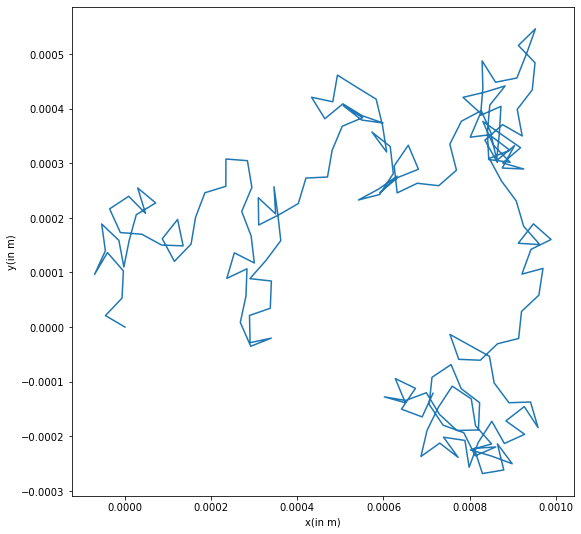

In [151]:
# just a small plot to see how the random walk looks like

r1 = rw(N, X0,L)
plt.plot(r1[:,0], r1[:,1])
plt.xlabel("x(in m)")
plt.ylabel("y(in m)");

## Monte-Carlo test of Cartesian statistics

In [10]:
xsam = np.zeros(M)
ysam = np.zeros(M)
r = np.zeros((M,N,2))
for i in range(M):
    # this stores all the trajectories since these are required for later questions
    r[i] = rw(N, X0,L)
    # Stores final x and y positions
    xsam[i] = r[i,-1,0]
    ysam[i] = r[i,-1,1]

In [12]:
def gaussian(x,s):
    y = np.exp(-(x**2)/(2*s**2))
    y = y/np.sqrt(2*np.pi*s**2)
    return y

In [13]:
SX = np.sqrt(N/2)*L
x_dat = np.linspace(-0.0025,0.0025,1000)
y_dat = gaussian(x_dat,SX)

Text(0, 0.5, 'Probability Distribution')

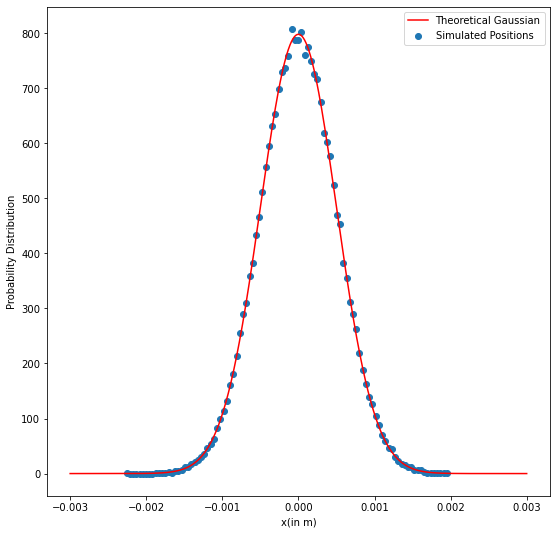

In [153]:
plt.plot(x_dat,y_dat,color='r', label = "Theoretical Gaussian")
[vals, bins] = np.histogram(xsam, bins=100, density=True)
mdt =  [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
plt.scatter(mdt, vals, label = "Simulated Positions")
plt.legend()
plt.xlabel("x(in m)")
plt.ylabel("Probability Distribution")

## Radial Distribution and Moments

In [15]:
# Note that this is simple random sampling with replacement, so the ddof=1(Bessel Correction)
# parameter in the sample variance can be omitted.
sx_sample = np.std(xsam)

frac_err = abs(SX - sx_sample)/SX

In [143]:
print("The fractional error comes out to be -->", frac_err)

The fractional error comes out to be --> 0.0011602547854891974


In [17]:
# radial distance has variance = Nl^2

r_var_theo = N*L**2
r_var = np.average(xsam**2) + np.average(ysam**2)
print("The computed value of r^2_N at N=200 or T = 2.0s --> ", r_var)
print("The analytical value of r^2_N at N=200 or T=2.0s --> ", r_var_theo)

The computed value of r^2_N at N=200 or T = 2.0s -->  4.979292269120964e-07
The analytical value of r^2_N at N=200 or T=2.0s -->  5e-07


In [38]:
Tvals = np.asarray([0.5,1.0,2.0])
rvals = np.zeros(len(Tvals))
# yvals = np.zeros(len(Tvals))
for i in range(len(Tvals)):
    Nv = int(Tvals[i]/DT)
    xv = np.sum(r[:,Nv-1,0]**2)
    yv = np.sum(r[:,Nv-1,1]**2)
    rvals[i] = 1/M*(xv+yv)
r_theo = 4*D*Tvals
print("The Computed rvals at T = 0.5, 1, 2 are --> ", rvals)
print("The Theoretical rvals at T = 0.5,1,2 are -->", r_theo)

The Computed rvals at T = 0.5, 1, 2 are -->  [1.22074117e-07 2.46988467e-07 4.97929227e-07]
The Theoretical rvals at T = 0.5,1,2 are --> [1.25e-07 2.50e-07 5.00e-07]


## Central Limit Convergence

In [138]:
# code that breaks it up into blocks
n = 50
xf = np.zeros((M,int(N/n)))
for i in range(M):
    xf[i,0] = r[i,n-1,0]
    for j in range(1,int(N/n)):
        # takes block chunks and subtracts the initial value to 
        # make the starting position of the random walk (0, 0)
        # note for a certain jth block
        # x_j = x_(j-1) + sum(k=1->n) l cos theta_k
        # essentially here we are considering n*M individual random walks
        xf[i,j] = r[i,(j+1)*n-1,0] - r[i,j*n+1,0]


In [156]:
# xf is a Mx4 matrix that we flatten to get the blocks
xf = xf.flatten()

# note that xf is just the sum, we need to divide by n to average it
xa = xf/n
std_dev = np.std(xa)
SX_block = np.sqrt(L**2/(2*n))
print("The computed Standard deviation for block size n= 50 is -->",std_dev)
print("The theoretical Standard deviation for block size 50 is -->",SX_block)

The computed Standard deviation for block size n= 50 is --> 4.906277915096344e-06
The theoretical Standard deviation for block size 50 is --> 5e-06


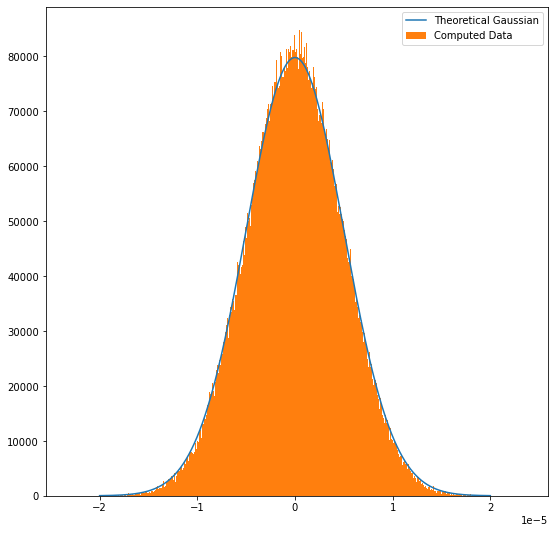

In [158]:
xd = np.linspace(-2e-5,2e-5,1000)
yd = gaussian(xd, SX_block)
plt.plot(xd,yd, label = "Theoretical Gaussian")
plt.hist(xa, bins=1000, density =True, label = "Computed Data");
plt.legend()
